In [1]:
import os
import numpy as np
import pprint
from fastestimator.summary.logs import parse_log_file
import matplotlib.pyplot as plt

/home/yunchan/anaconda3/envs/tf2.3/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [8]:
def plot_box_within_exp(ylim=None):
    acc = {}
    model_pool = [2,3,4,5,6,8,9,10]  # take out 1, 7 because they diverge too much
    for init_lr in ["0.1", "0.001", "0.00001"]:
        acc[init_lr] = []
        
        for model_run in model_pool:
            stat = []
            for run in range(5):
                summary = parse_log_file(f"../../../logs/supplementary/proxy_test/selection/run_{model_run}/{init_lr}_{run}.txt", ".txt")
                max_acc = np.max([x for x in summary.history["eval"]["accuracy"].values()])
                stat.append(max_acc)
            acc[init_lr].append(stat)
        
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    for i, key in enumerate(acc.keys()):
        
        bplot1 = axs[i].boxplot(
            acc[key],
            vert=True,  # vertical box aligmnent
            patch_artist=True)  # fill with color

        # set ax title
        axs[i].set_title(f"init_lr = {key}")
        axs[i].set_ylim(ylim)

        # adding horizontal grid lines
        axs[i].yaxis.grid(True)
        axs[i].set_xticks([y+1 for y in range(len(model_pool))])
        axs[i].set_xticklabels(model_pool)
    plt.savefig("../../../results/supplementary/model_selection.jpeg", dpi=300, transparent=True)

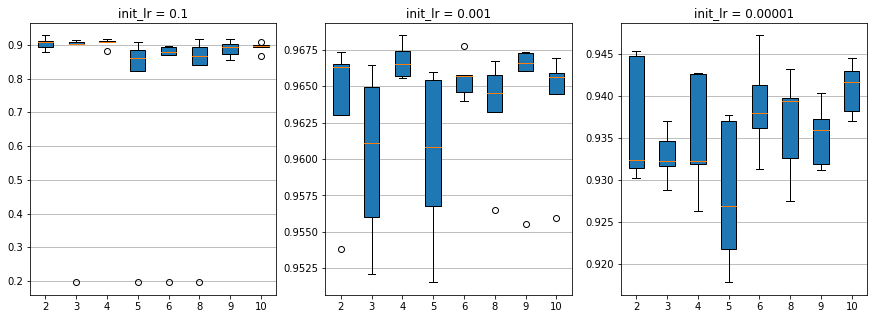

In [9]:
plot_box_within_exp()

In [6]:
def get_total(ylim=None):
    acc = {}
    for init_lr in ["0.1", "0.001", "0.00001"]:
        acc[init_lr] = []
        
        for model_run in range(1, 11):
            # svhn
            stat = []
            for run in range(5):
                summary = parse_log_file(f"../../../logs/supplementary/proxy_test/selection/run_{model_run}/{init_lr}_{run}.txt", ".txt")
                max_acc = np.max([x for x in summary.history["eval"]["accuracy"].values()])
                stat.append(max_acc)
            acc[init_lr].append(stat)
    
    total = [0] * 10
    for i in range(10):
        for init_lr in ["0.1", "0.001", "0.00001"]:
            total[i] += sum(acc[init_lr][i])
    
    return total

In [7]:
get_total()

[12.465926551936079,
 14.019668100799016,
 13.28841425937308,
 14.035456361401353,
 13.114128764597417,
 13.252343269821758,
 11.860287338660111,
 13.209741856177011,
 13.937269514443763,
 13.98924400737554]